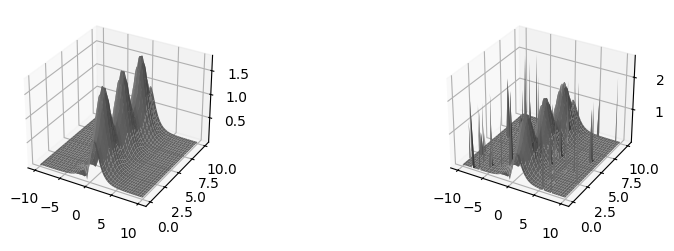

lambda_	0.2	epsilon1	1e-07	epsilon2	1e-05	mu	0.04444913619795588	rho	1.6	max_iter	1000
#svd	1	r(A)	1	|E|_0	0	stopCriterion	0.7254012336424688
#svd	2	r(A)	1	|E|_0	6	stopCriterion	0.3339488338846977
#svd	3	r(A)	2	|E|_0	26	stopCriterion	0.1975069682289401
#svd	4	r(A)	2	|E|_0	31	stopCriterion	0.09724275381989264
#svd	5	r(A)	2	|E|_0	35	stopCriterion	0.07768747200673942
#svd	6	r(A)	2	|E|_0	43	stopCriterion	0.05970944039242845
#svd	7	r(A)	2	|E|_0	44	stopCriterion	0.043950798952652144
#svd	8	r(A)	2	|E|_0	49	stopCriterion	0.037045329943347964
#svd	9	r(A)	2	|E|_0	50	stopCriterion	0.021757704061734495
#svd	10	r(A)	2	|E|_0	51	stopCriterion	0.01725950711364227
#svd	11	r(A)	2	|E|_0	51	stopCriterion	0.015572976919879565
#svd	12	r(A)	2	|E|_0	52	stopCriterion	0.014004880252325736
#svd	13	r(A)	2	|E|_0	53	stopCriterion	0.009427017154182458
#svd	14	r(A)	2	|E|_0	53	stopCriterion	0.008592469100936733
#svd	15	r(A)	2	|E|_0	53	stopCriterion	0.008394628452205339
#svd	16	r(A)	2	|E|_0	53	stopCriterion	0.008282375

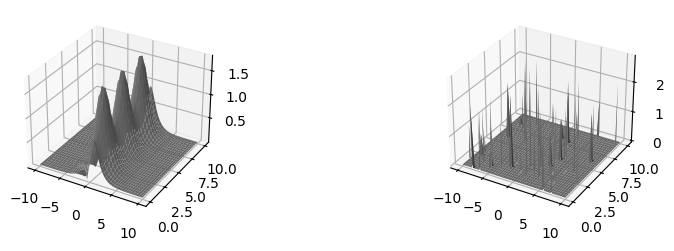

In [26]:
import numpy as np
from scipy.linalg import svd
import rpca.ealm
import rpca.ialm
import matplotlib.pyplot as plt

# pip install git+https://github.com/2020leon/rpca.git

n = 200
x = np.linspace(-10, 10, n)
t = np.linspace(0, 10, 30)
X, T = np.meshgrid(x, t)

usol = np.cosh(X) ** -1 * (1 - 0.5 * np.cos(2 * T)) + (np.cosh(X) ** -1 * np.tanh(X)) * (1 - 0.5 * np.sin(2 * T))


sam = 60
Atest2 = np.zeros((len(t), n))
Arand1 = np.random.rand(len(t), n)
Arand2 = np.random.rand(len(t), n)
r1 = np.random.permutation(len(t) * n)
r1k = r1[:sam]
for j in range(sam):
    Atest2[r1k[j] // n, r1k[j] % n] = -1

Anoise = Atest2 * (Arand1 + 1j * Arand2)
unoise = usol + 2 * Anoise

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot_surface(X, T, np.abs(usol), color='gray')
ax1 = fig.add_subplot(2, 2, 2, projection='3d')
ax1.plot_surface(X, T, np.abs(unoise), color='gray')


A1=usol.T
A2=unoise.T 
U1, S1, V1 = np.linalg.svd(A1)
U2, S2, V2 = np.linalg.svd(A2)

plt.show()

# Extract real and imaginary parts of unoise
ur = np.real(unoise)
ui = np.imag(unoise)

# Set lambda value
lambda_val = 0.2

# Apply inexact augmented Lagrange multiplier method for RPCA
R1r, R2r = rpca.ialm.fit(ur.T, lambda_val)
R1i, R2i = rpca.ialm.fit(ui.T, lambda_val)

# Combine real and imaginary parts
R1 = R1r + 1j * R1i
R2 = R2r + 1j * R2i

# Perform SVD
U3, S3, V3 = svd(R1.conj().T)

# Assuming R1 and R2 are defined

fig = plt.figure(figsize=(10, 6))

# Subplot 1
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.plot_surface(X, T, np.abs(R1.T), color='gray')

# Subplot 2
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot_surface(X, T, np.abs(R2.T), color='gray')

plt.show()

